In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('movies.csv')
df2 = pd.read_csv('ratings.csv')

print(df)

       movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
62418   209157                           We (2018)   
62419   209159           Window of the Soul (2001)   
62420   209163                    Bad Poems (2018)   
62421   209169                 A Girl Thing (2001)   
62422   209171      Women of Devil's Island (1962)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                              

In [3]:
# Collecting Unique Genres
unique_genres = set()

for movie_genre in df["genres"].dropna():
    for genre in movie_genre.split('|'):
        unique_genres.add(genre.strip())

unique_genres = sorted(unique_genres)
unique_genres.pop(0)
print(unique_genres)

['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [4]:
# cleaning dataset
print("Data Frame\n", df.count())
dupes = df[df.duplicated(subset="title")]
df.drop_duplicates(subset="title", inplace=True)
print("Duplicated\n", dupes.count())
print("Data Frame\n", df.count())
wrong_data = df.index[df["genres"] == '(no genres listed)'].to_list()
for i in wrong_data:
    df.drop(i, inplace=True)
print("Data Frame\n", df.count())

Data Frame
 movieId    62423
title      62423
genres     62423
dtype: int64
Duplicated
 movieId    98
title      98
genres     98
dtype: int64
Data Frame
 movieId    62325
title      62325
genres     62325
dtype: int64
Data Frame
 movieId    57273
title      57273
genres     57273
dtype: int64


In [5]:
# Replacing movies.csv 'genres' into 'genresId'
insert_id = []

for movie_id, movie_genre in zip(df['movieId'], df['genres']):
    movie_genres = {(x): False for x in unique_genres}
    movie_genres = {'movie_id': movie_id, **movie_genres}
    for genre in movie_genre.split('|'):
        movie_genres[genre] = True
    insert_id.append(movie_genres)

df1 = pd.DataFrame(insert_id)

print(df1)


       movie_id  Action  Adventure  Animation  Children  Comedy  Crime  \
0             1   False       True       True      True    True  False   
1             2   False       True      False      True   False  False   
2             3   False      False      False     False    True  False   
3             4   False      False      False     False    True  False   
4             5   False      False      False     False    True  False   
...         ...     ...        ...        ...       ...     ...    ...   
57268    209155    True      False      False     False    True  False   
57269    209157   False      False      False     False   False  False   
57270    209159   False      False      False     False   False  False   
57271    209163   False      False      False     False    True  False   
57272    209171    True       True      False     False   False  False   

       Documentary  Drama  Fantasy  Film-Noir  Horror   IMAX  Musical  \
0            False  False     True    

In [6]:
df.insert(2, "genreId", [i for i in range(len(df1))])
print(df)

       movieId                               title  genreId  \
0            1                    Toy Story (1995)        0   
1            2                      Jumanji (1995)        1   
2            3             Grumpier Old Men (1995)        2   
3            4            Waiting to Exhale (1995)        3   
4            5  Father of the Bride Part II (1995)        4   
...        ...                                 ...      ...   
62417   209155          Santosh Subramaniam (2008)    57268   
62418   209157                           We (2018)    57269   
62419   209159           Window of the Soul (2001)    57270   
62420   209163                    Bad Poems (2018)    57271   
62422   209171      Women of Devil's Island (1962)    57272   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             C

In [7]:
y_point = {}
for genre in unique_genres:
     y_point[genre] = 0
     for i in range(len(df1)):
          if df1.loc[i][genre]:
               y_point[genre] = y_point[genre] + 1                      


{'Action': 7340, 'Adventure': 4140, 'Animation': 2927, 'Children': 2932, 'Comedy': 16849, 'Crime': 5311, 'Documentary': 5596, 'Drama': 25569, 'Fantasy': 2727, 'Film-Noir': 353, 'Horror': 5973, 'IMAX': 195, 'Musical': 1054, 'Mystery': 2924, 'Romance': 7708, 'Sci-Fi': 3587, 'Thriller': 8631, 'War': 1873, 'Western': 1399}


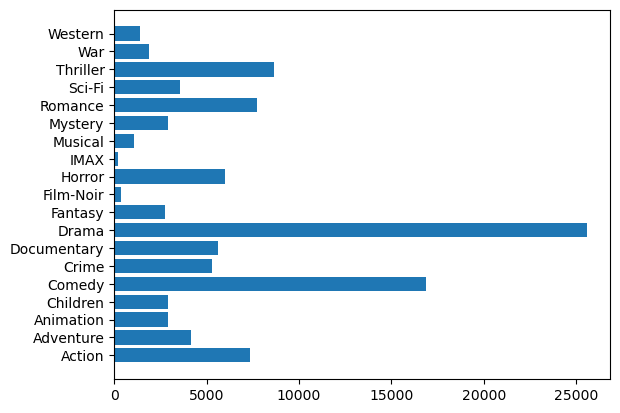

In [8]:
print(y_point)
yplot = list(y_point.values())
plt.barh(unique_genres, yplot)
plt.show()

In [31]:

ratings = df2.groupby('movieId')['rating'].agg(['mean', 'count']).to_dict()

print(ratings)

{'mean': {1: 3.893707794587238, 2: 3.2515271586594023, 3: 3.142028126058963, 4: 2.85354736424891, 5: 3.0584343520573674, 6: 3.854908898649748, 7: 3.3636663369601054, 8: 3.1145833333333335, 9: 2.992050660199407, 10: 3.42145763311516, 11: 3.6571705198920315, 12: 2.6245656241646618, 13: 3.333527696793003, 14: 3.4234888364494465, 15: 2.7190217391304348, 16: 3.8237068028689416, 17: 3.948806325713417, 18: 3.3843505768515074, 19: 2.6421677802524126, 20: 2.869921875, 21: 3.5701620505454055, 22: 3.3200173216412256, 23: 3.145691333982473, 24: 3.18758389261745, 25: 3.677304434479322, 26: 3.606708513142409, 27: 3.4039315155358274, 28: 4.03, 29: 3.936724864539434, 30: 3.6367924528301887, 31: 3.244838567977158, 32: 3.9057678412037236, 33: 3.023076923076923, 34: 3.6031917599186163, 35: 3.4792899408284024, 36: 3.91868681658758, 37: 2.993333333333333, 38: 2.870839936608558, 39: 3.4187380861608845, 40: 3.6267252195734003, 41: 3.843413033286451, 42: 3.0495652173913044, 43: 3.4499566724436743, 44: 2.65462

In [67]:
for movieId in ratings['mean']:
    print(movieId, ratings['mean'][movieId],ratings['count'][movieId])

1 3.893707794587238 57309
2 3.2515271586594023 24228
3 3.142028126058963 11804
4 2.85354736424891 2523
5 3.0584343520573674 11714
6 3.854908898649748 24588
7 3.3636663369601054 12132
8 3.1145833333333335 1344
9 2.992050660199407 3711
10 3.42145763311516 28265
11 3.6571705198920315 17042
12 2.6245656241646618 3741
13 3.333527696793003 1715
14 3.4234888364494465 5509
15 2.7190217391304348 2760
16 3.8237068028689416 18404
17 3.948806325713417 19729
18 3.3843505768515074 5374
19 2.6421677802524126 21552
20 2.869921875 3840
21 3.5701620505454055 22277
22 3.3200173216412256 9237
23 3.145691333982473 4108
24 3.18758389261745 7450
25 3.677304434479322 20070
26 3.606708513142409 2549
27 3.4039315155358274 1577
28 4.03 2950
29 3.936724864539434 8305
30 3.6367924528301887 1166
31 3.244838567977158 9106
32 3.9057678412037236 47054
33 3.023076923076923 65
34 3.6031917599186163 31456
35 3.4792899408284024 1352
36 3.91868681658758 19388
37 2.993333333333333 75
38 2.870839936608558 631
39 3.4187380861

In [51]:
copy = df.copy(True)
copy.insert(2, "rating", [0 for i in range(len(df1))])
copy.insert(3, "rates", [0 for i in range(len(df1))])
df = copy.copy()
print(df)

       movieId                               title  rating  rates  genreId  \
0            1                    Toy Story (1995)       0      0        0   
1            2                      Jumanji (1995)       0      0        1   
2            3             Grumpier Old Men (1995)       0      0        2   
3            4            Waiting to Exhale (1995)       0      0        3   
4            5  Father of the Bride Part II (1995)       0      0        4   
...        ...                                 ...     ...    ...      ...   
62417   209155          Santosh Subramaniam (2008)       0      0    57268   
62418   209157                           We (2018)       0      0    57269   
62419   209159           Window of the Soul (2001)       0      0    57270   
62420   209163                    Bad Poems (2018)       0      0    57271   
62422   209171      Women of Devil's Island (1962)       0      0    57272   

                                            genres  
0      Adv

In [ ]:
for key in ratings['mean']:
    df.loc[df['movieId'] == key, 'rating'] =  round(ratings['mean'][key], 2)
    df.loc[df['movieId'] == key, 'rates'] = ratings['count'][key]
    print(key)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279

In [66]:
print(df)

       movieId                               title  rating  rates  genreId  \
0            1                    Toy Story (1995)    3.89  57309        0   
1            2                      Jumanji (1995)    3.25  24228        1   
2            3             Grumpier Old Men (1995)    3.14  11804        2   
3            4            Waiting to Exhale (1995)    2.85   2523        3   
4            5  Father of the Bride Part II (1995)    3.06  11714        4   
...        ...                                 ...     ...    ...      ...   
62417   209155          Santosh Subramaniam (2008)    5.00      1    57268   
62418   209157                           We (2018)    1.50      1    57269   
62419   209159           Window of the Soul (2001)    3.00      1    57270   
62420   209163                    Bad Poems (2018)    4.50      1    57271   
62422   209171      Women of Devil's Island (1962)    3.00      1    57272   

                                            genres  
0      Adv

In [76]:
filter_rates = df[df['rates'] > 500]
top_rating = filter_rates.nlargest(5, 'rating')
print(top_rating)

       movieId                             title  rating  rates  genreId  \
45741   171011            Planet Earth II (2016)    4.48   1124    42411   
40597   159817               Planet Earth (2006)    4.46   1747    37976   
314        318  Shawshank Redemption, The (1994)    4.41  81482      314   
45593   170705           Band of Brothers (2001)    4.40   1356    42285   
840        858             Godfather, The (1972)    4.32  52498      840   

                 genres  
45741       Documentary  
40597       Documentary  
314         Crime|Drama  
45593  Action|Drama|War  
840         Crime|Drama  


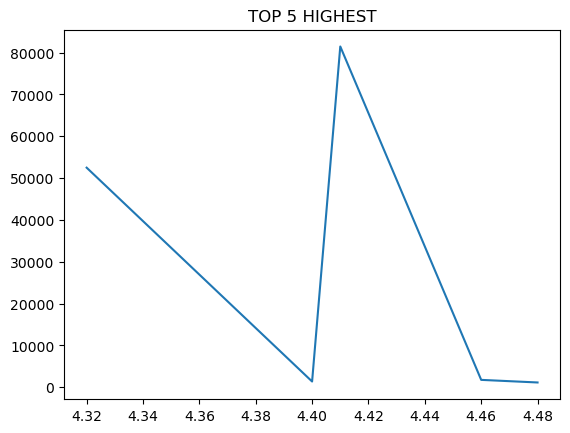

In [82]:
plt.plot(top_rating['rating'], top_rating['rates'])
plt.title("TOP 5 HIGHEST")
plt.show()

In [291]:
# SET PREFERENCE
def print_preference(user_preference):
    print("User preferred: ",user_preference)
def print_genres():
    i = 0
    for genre in unique_genres:
        print(i, '-', genre)
        i += 1
def check_symbol(string):
    for i in range(len(string)):
        if string[i] != ',' and not string[i].isdigit() and not string[i].isspace():
            return True
    return False
def set_preference():
    genres = []
    print_genres()
    while True:
        genre = input("Select genres (use 'commas' to add multiple genre): ")
        if check_symbol(genre):
            print("NOT ACCEPTABLE, TRY AGAIN.")
            continue
        for gnr in genre.split(','):
            genres.insert(len(genres),gnr)
        break
    prefer_rate = input("Select a rate (e.g. 4.0, 3.9): ")
    for i in range(len(genres)):
        genres[i] = unique_genres[int(genres[i])]
    print_preference({"genres": genres, 'rating': prefer_rate})
    return {"genres": genres, 'rating': prefer_rate}


In [220]:
# USERS STORAGE
users = {}

def addUser():
    name = input("ENTER USER NAME: ")
    users[name] = set_preference()
    return users[name], name
def set_current_user():
    name = input("ENTER USER NAME: ")
    if users.get(name) != None:
        return users[name], name
    return None

In [190]:
# SEARCHING
def search_title():
    title = input("Enter title: ")
    print(df[df['title'].str.contains('toy', case=False)])
def search_based_on_preference():
    print(df1)
def recommend_preference():
    return
    

In [ ]:
def scoring(user):
    temp = df.copy(True)
    temp.insert(6, 'score', [0 for i in range(len(temp))])
    print_preference(user)
    
    user_genre = "|".join(user['genres'])
    # 3 - RELEVANT
    genre_recommend = df[df['genres'].str.contains(user['genres'][0])]
    for genre in user['genres']:
        genre_recommend = genre_recommend[genre_recommend['genres'].str.contains(genre)]
    relevant = genre_recommend[genre_recommend['rating'] >= float(user['rating'])]
    for i in relevant['movieId']:
        temp.loc[temp['movieId'] == i, 'score'] = 3
        
    # 2 - SOMEHOW RELEVANT
    genre_recommend2 = df[df['genres'].str.contains(user_genre)]
    somehow_relevant1 = genre_recommend2[genre_recommend2['rating'] >= float(user['rating'])]
    somehow_relevant2 = genre_recommend[genre_recommend['rating'] >= float(user['rating']) - (1 if float(user['rating']) >= 1 else 0)]
    somehow_relevant2 = somehow_relevant2[somehow_relevant2['rating'] <= float(user['rating'])]
    for i in somehow_relevant1['movieId']:
        if temp.loc[temp['movieId'] == i, 'score'].values != 3:
            temp.loc[temp['movieId'] == i, 'score'] = 2
    for i in somehow_relevant2['movieId']:
        if temp.loc[temp['movieId'] == i, 'score'].values != 3:
            temp.loc[temp['movieId'] == i, 'score'] = 2
    # 1 - SLIGHTLY RELEVANT
    genre_recommend2 = df[df['genres'].str.contains(user_genre)]
    slightly_relevant1 = genre_recommend2[genre_recommend2['rating'] >= float(user['rating']) - (1 if float(user['rating']) >= 1 else 0)]
    slightly_relevant1 = slightly_relevant1[slightly_relevant1['rating'] <= float(user['rating'])]
    for i in slightly_relevant1['movieId']:
        if temp.loc[temp['movieId'] == i, 'score'].values != 3 and temp.loc[temp['movieId'] == i, 'score'].values != 2:
            temp.loc[temp['movieId'] == i, 'score'] = 1
   
    print(temp.loc[temp['score'] > 0].sort_values('score', ascending=False))
    count = temp['score'].value_counts()
    print(count)
    counts = [count[1], count[2], count[3]]
    print(counts)
    show_barh(counts)


def show_barh(counts):
    plt.barh([1,2,3], counts)
    plt.title("RELEVANCE SCORE FROM RECOMMENDATION")
    plt.show()
    

In [264]:
def start():
    current_user = ''
    current_user_name = ''
    i = 0
    while True:
        print(f"Step: {i}")
        print(f"CURRENT USER: {current_user_name}")
        print("ENTER OPERATION\n1 - ADD USER. 2 - SET USER. 3 - SEE RECOMMENDATION. 4 - EXIT:")
        choice = input()
        if choice == '1':
            current_user, current_user_name = addUser()
        elif choice == '2':
            current_user, current_user_name = set_current_user()
        elif choice == "4":
            break
        elif current_user_name == '':
            print("SET USER FIRST")
        elif choice == '3':
            scoring(current_user)
        i += 1
        


Step: 0
CURRENT USER: 
ENTER OPERATION
1 - ADD USER. 2 - SET USER. 3 - SEE RECOMMENDATION. 4 - EXIT:
0 - Action
1 - Adventure
2 - Animation
3 - Children
4 - Comedy
5 - Crime
6 - Documentary
7 - Drama
8 - Fantasy
9 - Film-Noir
10 - Horror
11 - IMAX
12 - Musical
13 - Mystery
14 - Romance
15 - Sci-Fi
16 - Thriller
17 - War
18 - Western
User preferred:  {'genres': ['Adventure', 'Comedy'], 'rating': '4'}
Step: 1
CURRENT USER: a
ENTER OPERATION
1 - ADD USER. 2 - SET USER. 3 - SEE RECOMMENDATION. 4 - EXIT:
User preferred:  {'genres': ['Adventure', 'Comedy'], 'rating': '4'}
       movieId                                      title  rating  rates  \
42711   164449               Teens in the Universe (1975)    4.21     12   
61797   206919               Garfield: His 9 Lives (1988)    4.50      1   
43479   166153                              A Fool (2015)    4.10      5   
47787   175315   The Adventures of Prince Florisel (1979)    4.15     10   
1167      1197                 Princess Bride, 

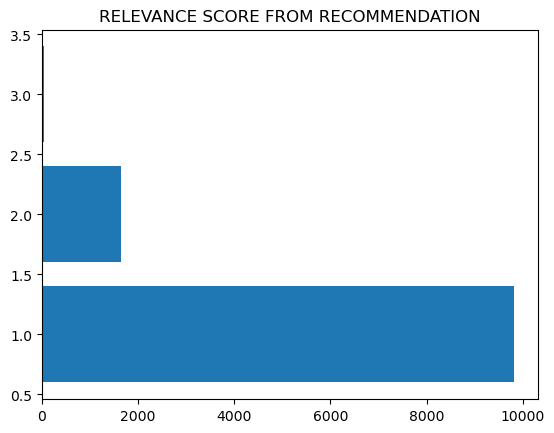

Step: 2
CURRENT USER: a
ENTER OPERATION
1 - ADD USER. 2 - SET USER. 3 - SEE RECOMMENDATION. 4 - EXIT:
Step: 3
CURRENT USER: a
ENTER OPERATION
1 - ADD USER. 2 - SET USER. 3 - SEE RECOMMENDATION. 4 - EXIT:
Step: 4
CURRENT USER: a
ENTER OPERATION
1 - ADD USER. 2 - SET USER. 3 - SEE RECOMMENDATION. 4 - EXIT:


KeyboardInterrupt: Interrupted by user

In [398]:
start()
